# 10-1 파이썬 정규표현식 TODO 🚀
아래 쿠팡 로켓프레시 상품 텍스트를 이용해 정규표현식 실습을 해봅시다. 

(아래 이미지는 실습을 위해 캡쳐한 것으로, 절대 광고가 아님을 알립니다.. 😅)


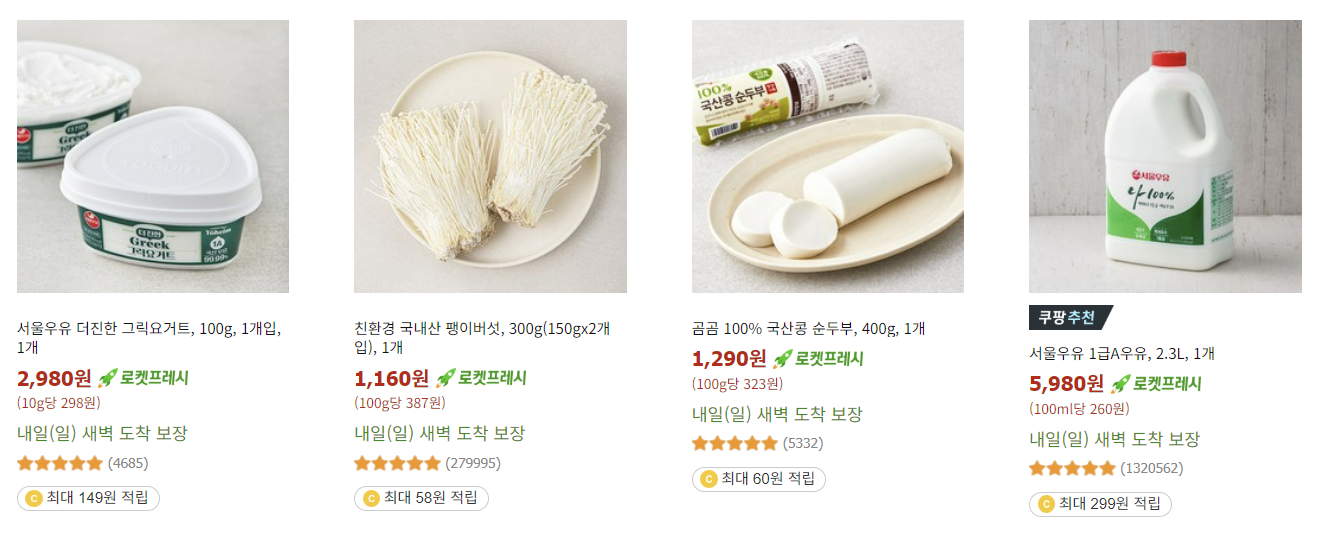

## 텍스트 데이터 확인 📃

In [4]:
food_list1 = """
서울우유 더진한 그릭요거트, 100g, 1개입, 1개 2,980원
친환경 국내산 팽이버섯, 300g(150gx2개입), 1개 1,160원
"""
food_list2 = """
곰곰 100% 국산콩 순두부, 400g, 1개 1,290원
[쿠팡추천] 서울우유 1급 A우유, 2.3L, 1개 5,980원
"""

텍스트 데이터를 확인해봅니다. 우선 상품이 줄바꿈 문자 `\n`을 기준으로 나뉘어 있다는 걸 확인합니다. 

In [2]:
food_list1

'\n서울우유 더진한 그릭요거트, 100g, 1개입, 1개 2,980원\n친환경 국내산 팽이버섯, 300g(150gx2개입), 1개 1,160원\n'

In [3]:
food_list2

'\n곰곰 100% 국산콩 순두부, 400g, 1개 1,290원\n[쿠팡추천] 서울우유 1급 A우유, 2.3L, 1개 5,980원\n'

필요한 모듈을 불러옵니다.

In [2]:
import re

## 문제 1: 상품명과 용량 추출 (1)

food_list1의 상품명과 용량을 추출합니다.

✅ 그룹핑을 이용하여 (상품명과 용량, 상품명, 용량)을 추출합니다.  
✅ 상품명 앞에 `\n`이 있습니다. 문자 클래스 `\s`나 `\b`를 이용합니다.  
✅ 팽이버섯은 '300g'까지만 추출합니다. 300g(150gx2개입) (X)

➡️ 출력 결과:
```markdown
[('서울우유 더진한 그릭요거트, 100g', '서울우유 더진한 그릭요거트', '100g'),
 ('친환경 국내산 팽이버섯, 300g', '친환경 국내산 팽이버섯', '300g')]
```

📢 문제를 풀기 전, 아래 참고사항 1. `re.findall()`을 확인해주세요.

In [22]:
p = re.compile(r"\n((\w{1,5}\s\w{1,5}\s\w{1,5}),\s(\d{1,}g))")
p.findall(food_list1)

[('서울우유 더진한 그릭요거트, 100g', '서울우유 더진한 그릭요거트', '100g'),
 ('친환경 국내산 팽이버섯, 300g', '친환경 국내산 팽이버섯', '300g')]

In [10]:
p = re.compile(r"\n(([\w\s]+\,\s([\d]+g)))")
p.findall(food_list1)

[('서울우유 더진한 그릭요거트, 100g', '서울우유 더진한 그릭요거트, 100g', '100g'),
 ('친환경 국내산 팽이버섯, 300g', '친환경 국내산 팽이버섯, 300g', '300g')]

## 문제 2: 상품명과 용량 추출 (2)

food_list2의 상품명과 용량을 추출합니다.

✅ 그룹핑을 이용하여 (상품명과 용량, 상품명, 용량)을 추출합니다.  
✅ 상품명 앞에 `\n`이 있습니다. 문자 클래스 `\s`나 `\b`를 이용합니다.  
✅ 상품명에 특수 문자 `%`가 있습니다.  
✅ 용량 단위가 g과 L가 있습니다.  
✅ 중요: 용량에 소수도 포함되어 있습니다. 

➡️ 출력 결과:
```markdown
[('서울우유 1급 A우유, 2.3L', '서울우유 1급 A우유', '2.3L'),
 ('곰곰 100% 국산콩 순두부, 400g', '곰곰 100% 국산콩 순두부', '400g')]
```

📢 문제를 풀기 전, 아래 참고사항 2. 비캡쳐 그룹 `(?:...)`을 확인해주세요.

In [ ]:
food_list2

'\n곰곰 100% 국산콩 순두부, 400g, 1개 1,290원\n[쿠팡추천] 서울우유 1급 A우유, 2.3L, 1개 5,980원\n'

In [78]:
p = re.compile(r"\s([\w\s%]+\,)")
p.findall(food_list2)

['곰곰 100% 국산콩 순두부,', '400g,', '1개 1,', '서울우유 1급 A우유,', '1개 5,']

## 문제 3: 상품의 가격 추출

food_list1에서 상품의 가격만 추출합니다. 

✅ 후방 탐색으로 '`1개 `' 뒤에 나오는 가격을 추출합니다.  

➡️ 출력 결과:
```markdown
['2,980원', '1,160원']
```

In [32]:
# 정답 코드를 입력하세요! 
re.findall(r"(?<=\개) [\d+]", food_list1)

[' 2', ' 1']

## 문제 4: 상품의 용량 추출

food_list2에서 상품의 용량만 추출합니다.

✅ 전방 탐색을 이용해 g 또는 L 단위 앞에 나오는 숫자를 추출합니다.

➡️ 출력 결과:
```markdown
['2.3', '400']
```

In [5]:
# 정답 코드를 입력하세요! 

## 문제 5: HTML 태그 내용 추출

### (1) 태그 전체 추출

Greedy와 Non-Greedy(Lazy) 방법을 이용해 아래와 같은 출력 결과를 만들어냅니다.

```markdown
['<span>팽이버섯</span><span>우유</span>']
['<span>팽이버섯</span>', '<span>우유</span>']
```

In [ ]:
food_tag = "<span>팽이버섯</span><span>우유</span>"

# Greedy
p = re.compile(_________)
result = p.findall(food_tag)
print(result)

# Lazy
p = re.compile(_________)
result = p.findall(food_tag)
print(result)

### (2) 태그 안 내용 추출

Greedy와 Non-Greedy 방법 중 하나를 택해 아래와 같은 출력 결과를 만들어냅니다.

```markdown
['팽이버섯', '우유']
```


In [4]:
# 정답 코드를 입력하세요!

## ⭐ 참고 사항

### 1. `re.findall()`

`re.findall()` 함수는 **정규식에 그룹(소괄호`()`)이 있다면 그 그룹만 꺼내고, 그렇지 않으면 전체 매칭된 문자열을 꺼냅니다.**   
위 문제에서 쉼표와 줄바꿈 문자 `\n`를 함께 꺼내고 싶지 않다면, 그룹 밖으로 빼야겠죠?

### 2. 비캡쳐 그룹 `(?:...)`

**매칭은 되지만, 결과에는 포함되지 않게끔** 합니다.

```python
import re
re.findall(r"(\d+)(?:g)", "100g, 200g")
# 결과: ['100', '200']

```
위 코드에서 g은 비캡쳐 그룹으로 묶였기 때문에 `findall` 함수 결과로 출력되지 않습니다.

➡️ **용량에 소수가 포함되어 있어요: 용량은 `(\d+(?:\.\d+)?[gL])`라고 써줍니다.**  

1. 맨 바깥 괄호 `(...)`: **용량 전체를 캡처 그룹으로 감쌉니다.** 즉, `findall()`로 추출하면 이 괄호 안 내용이 반환됩니다.
2. `\d+`: **소수점 앞 정수 부분**입니다. 하나 이상의 숫자가 오면 됩니다. `2.3`에서 `2` 부분에 해당합니다.
3. `(?:\.\d+)?`: **선택적인 소수 부분**입니다.
    - 먼저 비캡처 그룹`(?:...)`으로 지정해, 소수점 부분이 `findall()` 추출 결과로 반환되지 않게 합니다.
    - `\.\d+`: 소수점 아래 부분을 나타낸 것입니다. `.3`
    - 괄호 바깥 물음표 `(...)?`: 이 괄호가 패턴에 0번 또는 1번 나타나는 것임을 의미합니다. 즉, \"정수이거나(`2`) 소수이다(`2.3`)\"라는 의미입니다.